<a href="https://colab.research.google.com/github/fhergal/Machine-Learning-with-Python/blob/master/Actividad_1_A_Preprocesamiento_PorHacer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. PREPROCESAMIENTO DE DATOS
## 1. Eliminando duplicados
Se pueden eliminar duplicados fácilmente con el atributo de los dataframes **drop_duplicates**

In [1]:
import pandas as pd
#creamos una conjunto de datos donde hay duplicados
a=['q','w','e','w','q']
b=[3,1,5,1,3]
c=[9,2,6,2,9]
hf = pd.DataFrame([a,b,c]).T
hf

,0,1,2
0,q,3,9
1,w,1,2
2,e,5,6
3,w,1,2
4,q,3,9


In [ ]:
#eliminamos duplicados
hf.drop_duplicates()

,0,1,2
0,q,3,9
1,w,1,2
2,e,5,6


También es interesante eliminar atributos que sean combinación directa de otros atributos, esto lo podemos mirar en la matriz de correlaciones.
Generamos una variable que está basada linealmente en otra, y observamos cómo la correlación con la que está basada es igual
a 1. Esto nos induce a eliminar las variables que tengan una fuerte correlación con una más básica.

In [ ]:
#la construimos para probar
hf['dependiente']=3*hf[[1]]+8
hf

,0,1,2,dependiente
0,q,3,9,17
1,w,1,2,11
2,e,5,6,23
3,w,1,2,11
4,q,3,9,17


In [ ]:
hff=hf[[1,2,'dependiente']]
#cambiamos los datos a numéricos y calculamos la correlación


,1,2,dependiente
1,1.000000,0.647518,1.000000
2,0.647518,1.000000,0.647518
dependiente,1.000000,0.647518,1.000000


## 2. Limpieza de datos: Valores faltantes (MVs)
Hay diferentes estrategias para lidiar con los valores faltantes:
- **Borrado:**
    - *Instancias:* conservamos las instancias sin MVs.
    - *Atributos:* conservamos los atributos sin MVs.
- **Introducir media/mediana/moda del atributo:**
    - *General:* introducir en cada MVs el valor del estadístico media mediana ó moda de todas las instancias.
    - *Por clases:* introducir en cada MVs el valor del estadístico media mediana ó moda de cada clase.
- **Usar modelos predictivos y de aprendizaje automático:**
    - Consiste en usar un algoritmo para la introducción del valor faltante.

In [ ]:
# https://tmaxec.com/google-colaboratory-para-principiantes-abrir-archivos-graficos-importar-modulos/
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
irismv=pd.read_csv('/content/drive/My Drive/Colab Notebooks/ficheros/irisMV.data', comment='@', delimiter=',',header=None,na_values='<null>')
irismv.head()

,0,1,2,3,4
0,5.1,NaN,1.4,0.2,Iris-setosa
1,4.9,NaN,1.4,0.2,Iris-setosa
2,4.7,NaN,1.3,0.2,Iris-setosa
3,4.6,NaN,1.5,0.2,Iris-setosa
4,5.0,NaN,1.4,0.2,Iris-setosa


In [ ]:
#Calculamos el porcentaje de valores faltantes por categoría

#número de elementos de cada clase sin MVs, hay una cantidad razonable de cada uno como para hacer introducir MVs
#por categoría

Iris-versicolor    0.56
Iris-virginica     0.56
Iris-setosa        0.56
Name: 4, dtype: float64

In [ ]:
#borramos las instancias con MVs
irisborradoinst= #código a hacer
irisborradoinst.head()

,0,1,2,3,4
22,4.6,3.6,1.0,0.2,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
25,5.0,3.0,1.6,0.2,Iris-setosa
26,5.0,3.4,1.6,0.4,Iris-setosa


In [ ]:
#borramos los atributos con MVs
irisborradoatr= -----------------
irisborradoatr.head()
#este borrado por atributos es absurdo en este caso ya que elimina todos los atributos que tienen MVs

,0,2,3,4
0,5.1,1.4,0.2,Iris-setosa
1,4.9,1.4,0.2,Iris-setosa
2,4.7,1.3,0.2,Iris-setosa
3,4.6,1.5,0.2,Iris-setosa
4,5.0,1.4,0.2,Iris-setosa


Para hacer introducción de valores faltantes usaremos el módulo scikit-learn (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) que trae incluida la herramienta Imputer, que introduce medias medianas y modas por atributos.
Para poder ejecutar el Imputer hemos de eliminar las columnas categóricas
Vemos un ejemplo de introducción de medias

In [ ]:
import sklearn.impute as ski
import numpy as np
import seaborn as sns

#la función que introduce los valores es SimpleImputer en el módulo sklearn.imputer
#aquí definimos la función y la estrategia, en este caso la media general del atributo:
imp = ski.SimpleImputer(missing_values=np.nan, strategy='mean')
irismedia=pd.DataFrame(imp.fit_transform(irismv.iloc[:,0:4],y=irismv.iloc[:,0:4]))
irismedia.head()

,0,1,2,3
0,5.1,3.045238,1.4,0.2
1,4.9,3.045238,1.4,0.2
2,4.7,3.045238,1.3,0.2
3,4.6,3.045238,1.5,0.2
4,5.0,3.045238,1.4,0.2


In [ ]:
# Introducimos las medianas, este estadístico es el recomendado en la mayor parte de los casos por ser robusto


,0,1,2,3
0,5.1,3.0,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.0,1.3,0.2
3,4.6,3.0,1.5,0.2
4,5.0,3.0,1.4,0.2


In [ ]:
#Introducimos modas


,0,1,2,3
0,5.1,3.0,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.0,1.3,0.2
3,4.6,3.0,1.5,0.2
4,5.0,3.0,1.4,0.2


## 3. Tratamiento de valores atípicos
Un outlier ó valor atípico es una instancia cuyo valor es extremo y no se corresponde con el conjunto
de datos ó pertenece a una clase que no le correspondería de manera natural.

El proceso consta de dos partes:
1. Identificación de valores atípicos
2. Tratamiento de los valores atípicos:
    a. Eliminación.
    b. Sustitución del valor por uno de los métodos vistos en tratamiento de valores faltantes.

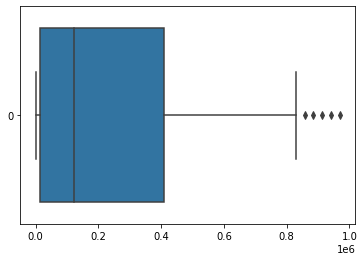

In [ ]:
X=pd.DataFrame(np.arange(0,100)**3)
sns.boxplot(data=X,orient="h",whis=1.1)

Calculamos los puntos de corte para valores atípicos según el criterio establecido pero con un umbral de 1.1 en rango intercuartílico:

In [ ]:
#calculamos el rango intercuartílico
Q1=-----------
Q2=-----------
IQ = --------
print(IQ)
print(Q1-(1.1)*IQ)
print(Q2+(1.1)*IQ)

394212.0
-418458.45
843019.95


In [ ]:
X.columns

RangeIndex(start=0, stop=1, step=1)

In [ ]:
#observamos que al hacer la selección hemos eliminado las 6 últimas posiciones como valores atípicos
X.loc[(X[0]>Q1 - (1.1)*IQ)&(X[0]<Q2+1.1*IQ)].tail()

,0
90,729000
91,753571
92,778688
93,804357
94,830584


## 4. Normalización de datos
Consiste en reestructurar los valores numéricos de las instancias para dejarlos en disposición
óptima para que los algoritmos a aplicar funcionen con la mayor estabilidad posible, garantizando
buenos resultados.

Tipos de normalización:
- **Normalización Min-Max:** Consiste en llevar cada atributo al intervalo [0,1], de modo que todos tendrán la misma escala. Esta es la normalización más básica posible y está destinada a evitar problemas numéricos.
![image.png](attachment:image.png)

- **Normalización Gauss:** Consiste en sustraer la media y dividir entre la desviación típica muestrales. Esto centra los datos en 0 y con varianza unitaria 1. La normalización Gauss es la más requerida por los algoritmos de aprendizaje automático.
![image.png](attachment:image.png)

- **Normalización L1 y L2:** Consiste en dividir cada instancia por una de sus normas vectoriales, en función de lo que estemos interesados en conseguir.

In [ ]:
1e20+1

1e+20

Podemos observar que se ha despreciado el valor sumado como 1 en este ejemplo.
Este resultado se debe a la capacidad limitada del ordenador para representar los números (coma flotante).
Es por tanto imprescindible adecuar las diferentes escalas numéricas de los atributos de las instancias para que no se ignore ninguna y
todas tengan una relevancia equilibrada a priori.
Si no hiciéramos este proceso, los atributos con mayor escala decidirían muy por encima de aquellos que tienen escala reducida.

In [ ]:
from sklearn.datasets import load_iris
X=pd.DataFrame(load_iris().data)
print(X.head())
#el algoritmo a continuación normaliza el dataframe al intervalo 01 y utilizaremos MinMaxScaler().fit_transform() sobre X
import sklearn.preprocessing as sk
X_rang01=pd.DataFrame(----------------)
X_rang01.head()

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [ ]:
#hacemos normalización Gauss con scale()
X_z=pd.DataFrame(----------------)
X_z.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
#hacemos normalización L1 y L2 usando normalize()
X_l1=pd.DataFrame(----------------)
X_l1.head()

,0,1,2,3
0,0.500000,0.343137,0.137255,0.019608
1,0.515789,0.315789,0.147368,0.021053
2,0.500000,0.340426,0.138298,0.021277
3,0.489362,0.329787,0.159574,0.021277
4,0.490196,0.352941,0.137255,0.019608


In [ ]:
X_l2=pd.DataFrame(-----------------)
X_l2.head()

,0,1,2,3
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


# 5. Transformación de datos
La transformación de datos pretende dar una estructura de dependencia lineal entre los mismos si
es posible, así como homogeneizar la varianza de cada uno.

Las transformaciones usuales son
- **Logarítmica:** homogeniza la varianza y reduce el sesgo hacia la derecha de las distribuciones

- **Transformación Box-Cox:** homogenizan la varianza de manera más genérica, existen múltiples elecciones de lambda posibles, todas positivas.

- **Discretización:** consiste en dividir el intervalo continuo donde se distribuyen los datos numéricos agrupándolos en una cantidad finita de grupos.

1. Aplicaremos logarítmica

In [ ]:
Xlog=np.log(X)
Xlog.head()

,0,1,2,3
0,1.629241,1.252763,0.336472,-1.609438
1,1.589235,1.098612,0.336472,-1.609438
2,1.547563,1.163151,0.262364,-1.609438
3,1.526056,1.131402,0.405465,-1.609438
4,1.609438,1.280934,0.336472,-1.609438


2. Ahora usaremos discretización

In [ ]:
#tomamos el dataframe iris y lo vamos a discretizar en 3 categorías por cada atributo
Xdiscret=X.copy()
from sklearn.preprocessing import label_binarize
#creamos los bins (categorías ó intervalos en los que agrupamos)
#en este caso son tres para cada variable, después los montamos en un DataFrame
labels={}
df=pd.DataFrame()
for k in range(0,4):
    labels[k]=['Bajo‐'+str(k),'Medio‐'+str(k),'Alto‐'+str(k)]
    bins=pd.cut(Xdiscret[k], bins=3,labels=labels[k],retbins=True)[0]
    df=pd.concat([df,pd.DataFrame(label_binarize(bins, classes=labels[k]),columns=labels[k])],axis=1)

df.head()

,Bajo‐0,Medio‐0,Alto‐0,Bajo‐1,Medio‐1,Alto‐1,Bajo‐2,Medio‐2,Alto‐2,Bajo‐3,Medio‐3,Alto‐3
0,1,0,0,0,1,0,1,0,0,1,0,0
1,1,0,0,0,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,1,0,0,1,0,0
3,1,0,0,0,1,0,1,0,0,1,0,0
4,1,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
[pd.cut(Xdiscret[k], bins=3,labels=labels[k],retbins=True)[1] for k in range(0,4)]

[array([4.2964, 5.5   , 6.7   , 7.9   ]),
 array([1.9976, 2.8   , 3.6   , 4.4   ]),
 array([0.9941    , 2.96666667, 4.93333333, 6.9       ]),
 array([0.0976, 0.9   , 1.7   , 2.5   ])]